In [6]:
# Import the dependencies
import numpy as np
from scipy.linalg import toeplitz, cholesky, sqrtm, inv
# import scipy.linalg as la
from scipy import signal
from scipy.integrate import odeint
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
print("Imports done")


Imports done


In [7]:
from statistics import mean, variance, pstdev
# Setting up the time data:
dt = 0.005; # integration step, average neuron resets 200 times per second
T =100 + dt; # maximum time considered
t = np.arange(0,T,dt)
N= t.size #Amount of data points



def g_gp(x):

    t0=25
    return t0 -16 / (1 + np.exp(5-x/5))

def dg_gp(x):
    
    return -16/5* np.exp(5-x/5) / (np.exp(5-x/5)+1)**2





#initate arrays
mu_x = np.zeros(N)
e_x = np.zeros(N)
e_y = np.zeros(N)
y =np.zeros(N)
x = np.ones(N)*30


omega_x = np.zeros(N)
omega_y = np.zeros(N)
sigma_x = np.zeros(N)
sigma_y = np.zeros(N)
std = np.zeros(N)


omega_x[0] = 5
omega_y[0] = 5
mu_v = 30
mu_x[0]= 25
std_noise_x = 0.5

std_noise_y = 1
alpha_x = 10
alpha_y = 1

alpha_mux = 30
dmuxvec= [0]

for i in np.arange(0,N-1):
   # x = x + np.random.randn(1)*std_noise
    
    
    x[i] = x[i]         + np.random.randn(1)*std_noise_x
    y[i] = g_gp(x[i])   + np.random.randn(1)*std_noise_y 


    sigma_x[i] =  1/omega_x[i]
    sigma_y[i] =  1/omega_y[i]
    
    
    e_x[i] = mu_x[i] - mu_v            # + Originele noise injecstie   
    e_y[i] = y[i] - g_gp(mu_x[i])      # + Originele noise injectie


    
    domega_x = alpha_x*(0.5*(1/omega_x[i] - e_x[i]**2))
    domega_y = alpha_y*(0.5*(1/omega_y[i] - e_y[i]**2))
    
    
    omega_x[i+1] = omega_x[i] + dt*domega_x
    omega_y[i+1] = omega_y[i] + dt*domega_y

    dFdmu_x = e_x[i]*omega_x[i] - dg_gp(mu_x[i]) * e_y[i]*omega_y[i]
    
    

    dmu_x   = 0 - alpha_mux* dFdmu_x
    
    mu_x[i+1] = mu_x[i] + dt*dmu_x

    dmuxvec.append(dmu_x)
    sigma_x[i+1] =1/ omega_x[i+1]
    sigma_y[i+1] =1/ omega_y[i+1]





In [8]:
# print(g_gp(30))
# print(g_gp(25))
# print(np.sqrt((dg_gp(30)*std_noise_x)**2) + std_noise_y**2)

# print(13.30/30*std_noise_x**2 + std_noise_y**2)

print(np.var(e_x[10000:]))
print(np.mean(sigma_x[10000:]))

print(np.var(e_y[10000:]))
print(np.mean(sigma_y[10000:]))


0.07952769553227045
0.07960688640377378
1.0399146774734893
1.0435959585864076


In [9]:
# from statistics import mean, variance, pstdev
# # Setting up the time data:
# dt = 0.005; # integration step, average neuron resets 200 times per second
# T = 900+dt; # maximum time considered
# t = np.arange(0,T,dt)
# N= t.size #Amount of data points



# def g_gp(x):

#     t0=25
#     return t0 -16 / (1 + np.exp(5-x/5))

# def dg_gp(x):
    
#     return -16/5* np.exp(5-x/5) / (np.exp(5-x/5)+1)**2





# #initate arrays
# mu_x = np.zeros(N)
# e_x = np.zeros(N)
# e_y = np.zeros(N)
# y =np.zeros(N)

# omega_x = np.zeros(N)
# omega_y = np.zeros(N)
# sigma_x = np.zeros(N)
# sigma_y = np.zeros(N)
# EWMA_x = np.zeros(N)
# EWMA_y = np.zeros(N)

# std = np.zeros(N)


# omega_x[0] = 1
# omega_y[0] = 5
# mu_v = 25
# mu_x[0]= mu_v
# x = 30
# std_noise = 0.3


# y[0] = g_gp(x)




# for i in np.arange(0,N-1):
#    # x = x + np.random.randn(1)*std_noise
    
#     sigma_x[i] = 1/omega_x[i]
#     sigma_y[i] =  1/omega_y[i]
    
    
#     e_x[i] = mu_x[i] - mu_v
#     e_y[i] = y[0] - g_gp(mu_x[i])+ np.random.randn(1)*std_noise
   

#     domega_x = 0.5*(sigma_x[i]- e_x[i]**2)
#     domega_y = 0.5*(sigma_y[i]- e_y[i]**2)
    
#     # # WMA
#     # if i >50:
#     #     omega_x[i+1] = omega_x[i] + dt*domega_x
#     #     omega_y[i+1] = np.mean(omega_y[i-50:i]) + dt*domega_y
#     # else:
#     #     omega_x[i+1] = omega_x[i] + dt*domega_x
#     #     omega_y[i+1] = omega_y[i] + dt*domega_y
    
#     #EWMA
#     # omega_x[i+1] = omega_x[i] + dt*domega_x
#     # omega_y[i] = 0.2*omega_y[i] + (1-0.2)*omega_y[i-1] 
#     # omega_y[i+1] = omega_y[i] + dt*domega_y

#     dFdmu_x = e_x[i]*omega_x[i] - dg_gp(mu_x[i]) * e_y[i]*omega_y[i]
#     dmu_x   = 0 - dFdmu_x
#     mu_x[i+1] = mu_x[i] + dt*dmu_x


#     sigma_x[i+1] =1/ omega_x[i+1]
#     sigma_y[i+1] =1/ omega_y[i+1]

[25.         30.81898125 29.72294911 ... 29.74754914 30.17862553
 29.79974703]


Text(0.5, 1.0, 'Sigma_z')

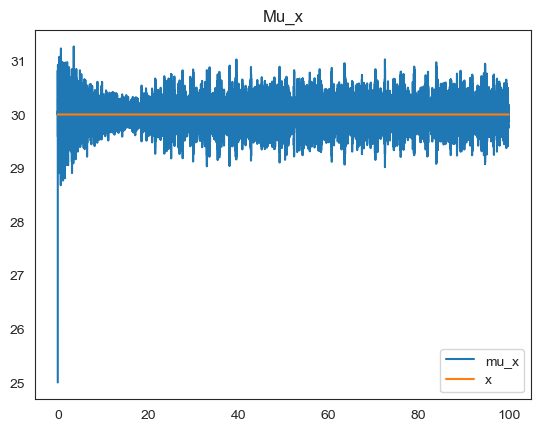

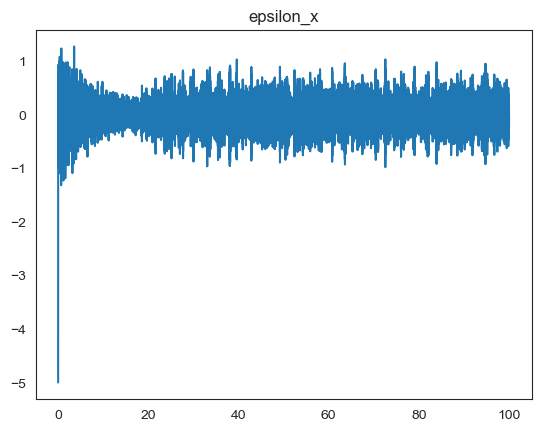

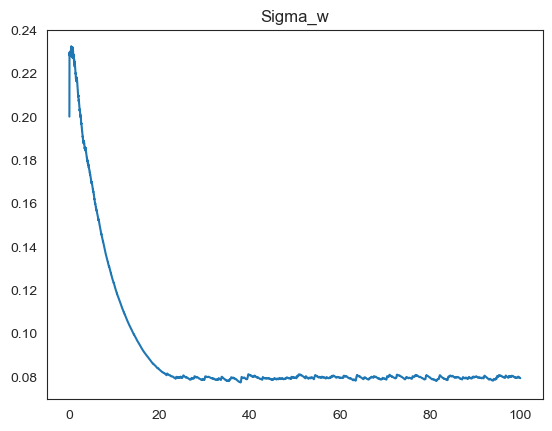

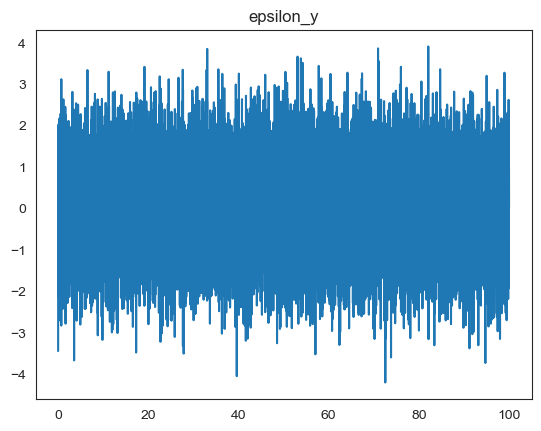

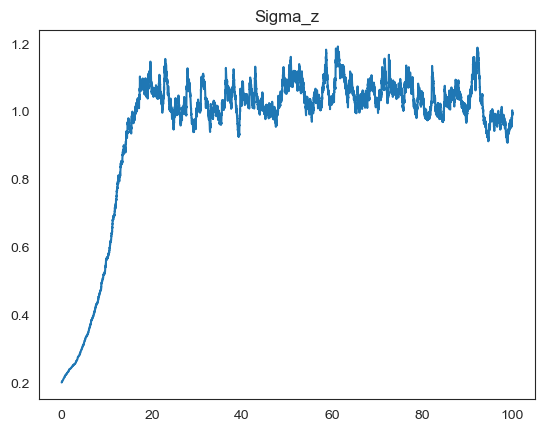

In [10]:
# print(sigma_x)
# print(sigma_y)
print(mu_x)

plt.figure()
plt.plot(t, mu_x, label =  "mu_x")
plt.plot(t, x, label = "x" )
plt.legend()
plt.title(label ="Mu_x")

plt.figure()
plt.plot(t, e_x, label= "epsilon_x")
plt.title(label ="epsilon_x")

plt.figure()
plt.plot(t,sigma_x, label =  "sigma_w")
plt.title(label ="Sigma_w")

plt.figure()
plt.plot(t, e_y, label = "epsilon_y")
plt.title(label ="epsilon_y")

plt.figure()
plt.plot(t, sigma_y, label = "sigma_z")
plt.title(label ="Sigma_z")

# plt.figure()
# plt.plot(mu_x[19950:])


# plt.figure()
# plt.plot(t,y)

